In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading Data

In [2]:
df = pd.read_csv(r"flood4.csv")
df.head(5)

,ID,flood,elveation,slope,Distance_Rivers,Precipitation
0,1,1,11.006955,2.358794,108,466.600006
1,2,0,9.139240,1.335799,51,424.399994
2,3,1,10.817870,2.808787,40,424.399994
3,4,1,9.000000,0.000000,78,424.399994
4,5,1,19.637095,1.798857,57,424.399994


## Split training data further into training and Test


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
y = df['flood']
x = df.drop (['flood'], axis = 1)
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.30, random_state =55)
X_train

,ID,elveation,slope,Distance_Rivers,Precipitation
1,2,9.139240,1.335799,51,424.399994
25,26,34.376950,7.949885,652,512.250000
50,51,23.000000,0.000000,38,590.500000
21,22,56.108719,9.535309,700,512.250000
40,41,23.000000,0.000000,30,590.500000
20,21,45.323214,2.902263,600,512.250000
44,45,59.116174,5.756005,880,590.500000
9,10,8.000000,0.000000,57,424.399994
38,39,23.000000,0.000000,52,590.500000
45,46,23.000000,0.000000,43,590.500000


# Exploring the data

In [5]:
df[["flood" , "elveation" , "slope", "Precipitation"]].describe()

,flood,elveation,slope,Precipitation
count,60.000000,60.000000,60.000000,60.000000
mean,0.533333,35.678764,3.360172,533.331665
std,0.503098,17.744235,2.977689,57.991026
min,0.000000,8.000000,0.000000,424.399994
25%,0.000000,23.000000,0.961600,512.250000
50%,1.000000,32.598135,2.855525,517.725006
75%,1.000000,48.071736,5.780210,590.500000
max,1.000000,75.243634,11.897410,590.500000


1    32
0    28
Name: flood, dtype: int64


<AxesSubplot:title={'center':'Flood occurrence and non-occurrence data'}>

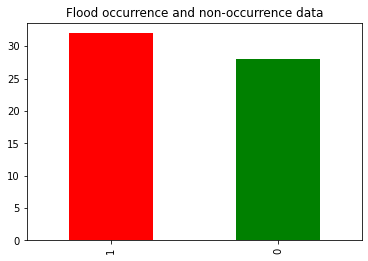

In [6]:
print (df.flood.value_counts())
df.flood.value_counts ().plot (kind="bar", color=["red", "green"], title= 'Flood occurrence and non-occurrence data')

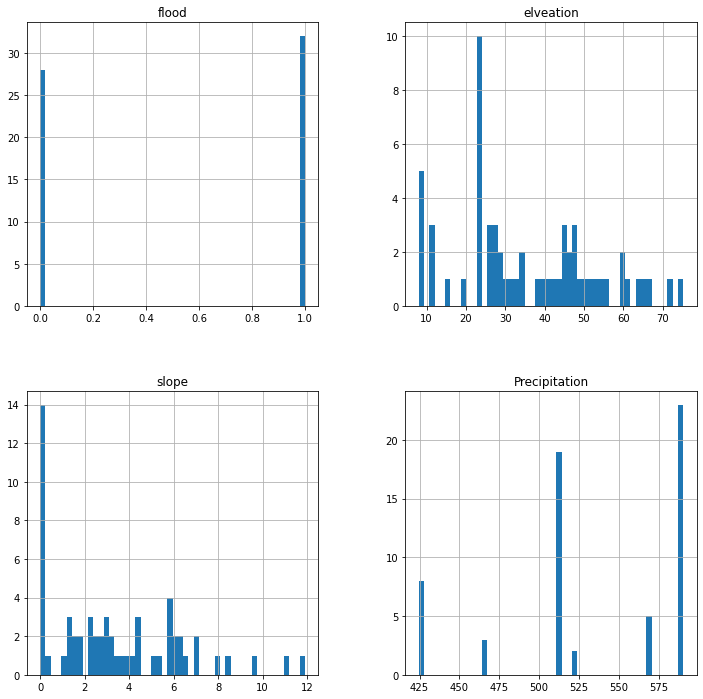

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df[["flood" , "elveation" , "slope", "Precipitation"]].hist(bins=50, figsize=(12,12))
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               60 non-null     int64  
 1   flood            60 non-null     int64  
 2   elveation        60 non-null     float64
 3   slope            60 non-null     float64
 4   Distance_Rivers  60 non-null     int64  
 5   Precipitation    60 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.9 KB


In [9]:
df.isna().sum()

ID                 0
flood              0
elveation          0
slope              0
Distance_Rivers    0
Precipitation      0
dtype: int64

# Preparing the Data

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
ds_model = DecisionTreeClassifier(random_state=0)

In [12]:
ds_model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=0)

In [13]:
y_pred = ds_model.predict(X_test)

In [14]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy for model: %.2f" % (accuracy_score(y_test, y_pred)*100))

Accuracy for model: 72.22


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
cm1 = confusion_matrix(y_test, y_pred)

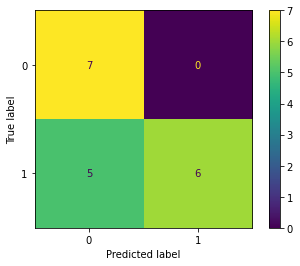

In [18]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
cm_disp.plot()

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier(random_state=0)

In [21]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [22]:
y_pred = ds_model.predict(X_test)

In [23]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy for model: %.2f" % (accuracy_score(y_test, y_pred)*100))

Accuracy for model: 72.22


In [25]:
cm1 = confusion_matrix(y_test, y_pred)

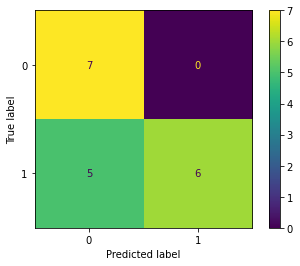

In [26]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
cm_disp.plot()

# xgboost

In [27]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report #prediction and Classification Report

In [28]:
model= xgb.XGBClassifier()
train_model = model.fit(X_train, y_train)

[20:54:06] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\97059\anaconda3\envs\mlgiss\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [29]:
y_pred = train_model.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy for model: %.2f" % (accuracy_score(y_test, y_pred)*100))

Accuracy for model: 94.44


In [31]:
cm1 = confusion_matrix(y_test, y_pred)

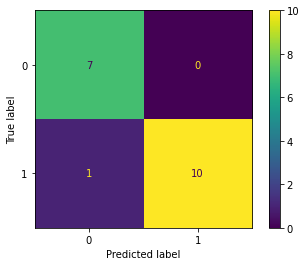

In [32]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
cm_disp.plot()

# Sample

In [33]:
datanew = pd.read_csv(r"flood6.csv")
datanew

,OBJECTID_1,elveation,slope,Distance_R,Precipitat
0,2,37.074029,5.754520,730,424.399994
1,3,54.844981,3.917561,1000,424.399994
2,4,9.814543,1.114918,200,424.399994
3,5,50.464706,7.316616,1000,424.399994
4,6,28.586240,1.292417,300,424.399994
5,7,30.088753,2.898544,200,424.399994
6,8,51.919829,3.421623,1200,512.250000
7,9,13.048523,3.055299,400,424.399994
8,10,30.100997,1.991433,600,424.399994
9,11,49.213720,4.336002,400,512.250000


In [34]:
y_pred = train_model.predict(datanew)

In [35]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [36]:
y_pred_dataframe = pd.DataFrame(y_pred,columns = ['Column_A'])
datanew["Target"]=y_pred_dataframe
datanew

,OBJECTID_1,elveation,slope,Distance_R,Precipitat,Target
0,2,37.074029,5.754520,730,424.399994,0
1,3,54.844981,3.917561,1000,424.399994,0
2,4,9.814543,1.114918,200,424.399994,1
3,5,50.464706,7.316616,1000,424.399994,0
4,6,28.586240,1.292417,300,424.399994,1
5,7,30.088753,2.898544,200,424.399994,1
6,8,51.919829,3.421623,1200,512.250000,0
7,9,13.048523,3.055299,400,424.399994,1
8,10,30.100997,1.991433,600,424.399994,0
9,11,49.213720,4.336002,400,512.250000,0


In [37]:
datanew.to_csv(r"flood7.csv")